#  Value Iteration

In this notebook, we meet **value iteration** as a first basic method to approach RL problems. Value iteration is a planning algorithm and is therefore an example for [model-based learning](http://rail.eecs.berkeley.edu/deeprlcourse-fa17/f17docs/lecture_9_model_based_rl.pdf).

For the code example, we build on the intelligible [blog post by Moustafa Alzantot](https://medium.com/@m.alzantot/deep-reinforcement-learning-demysitifed-episode-2-policy-iteration-value-iteration-and-q-978f9e89ddaa).

## Example: Frozen Lake

As motivating example, we consider the game ``Frozen Lake``, which exhibits reasonably small state and action spaces. The [description](https://gym.openai.com/envs/FrozenLake-v0/) reads as follows:

*Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.*

In [ ]:
import gym
env = gym.make('FrozenLake-v0')
print(env.nS)
print(env.nA)

s = env.reset()
env.render()
env.step(env.action_space.sample())
env.render()

How do we find a policy to maximize our average chances for reaching the target?

## Value Iteration

Value iteration is based on the principle of [dynamic programming](https://en.wikipedia.org/wiki/Dynamic_programming). To each state $s$ in the state space $S$, we introduce the **value function**
$$V^*(s) = \max_{\pi }\mathbb E_{\pi}[R|s_0 = s]$$
as the expected rewards when following the optimal policy $\pi = \pi_\mathsf{opt}$.

In order to determine $V^*(s)$, we proceed recursively and first initialize $V^0(s) = 0$ for all $s \in S$. When $V^n(s)$ is constructed, we determine an approximation $Q^n(s,a)$ of the **state-value function** via computing the expected rewards for an action $a$ in the action space $A$ given the current value function:
$$Q^n(s, a) = \sum_{s' \in S} p(s' | s, a) \big(r(s, a, s') + V^n(s')\big).$$

Then, the value of the new state results from maximizing over all possible actions
$$V^{n + 1}(s) = \max_{a \in A} Q^n(s, a).$$

At this point, we understand why value iteration is a model-based approach. The dynamic programming is only feasible if the transition probabilities are known.

In [ ]:
import numpy as np

def dyn_prog(v, env):
    """A dynamic programming step in value iteration
    
    # Arguments
        v: current value function
        env: environment for the problem
    # Result
        updated value function
    """
    v_new = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = [sum([p * (r + v[ss]) for p, ss, r, _ in env.P[s][a]]) 
                for a in range(env.nA)] 
        v_new[s] = max(q_sa)
    return v_new

In value iteration, we now derive increasingly precise estimates of the value function by iterating the dynamic-programming step.

In [ ]:
def value_iteration(niter, env):
    """Value iteration
    
    # Arguments
        niter: number of iterations
        env: environment for the problem
    # Result
        estimate for value function after value iteration
    """
    v = np.zeros((iters, env.nS))
    for i in range(iters - 1):
        v[i + 1, :] = dyn_prog(v[i, :], env)        
    return v

## Visualization

Now, we visualize how quickly value iteration converges to the true value function.

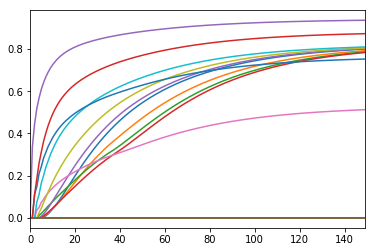

In [13]:
import pandas as pd
%matplotlib inline 

niter = int(1.5e2)

val_trace = value_iteration(niter, env)
df = pd.DataFrame(val_trace)
df.plot(legend = False)